# 実践編 Chap.07 実践編 線形回帰モデル（回帰）

In [1]:
# ライブラリの準備
# 必要ライブラリの宣言
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

plt.style.use('seaborn-darkgrid')
# plt.style.use('ggplot')
rcParams['font.family'] = 'IPAexgothic'
%matplotlib inline

# waring抑止
import warnings
warnings.filterwarnings('ignore')

## 7.1 損失関数の偏微分と勾配降下法

## 7.2 例題の問題設定

- 「The Boston Housing Dataset」
  - 機械学習で利用される公開データ
  - <http://lib.stat.cmu.edu/datasets/boston>

In [3]:
# 「ボストン・データセット」はscikit-learnのライブラリでも取得できるが、
# その場合、将来版で利用できなくなる予定のため、別Webサイトから取得する
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(
    data_url, sep="\s+", skiprows=22, header=None
)

raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


## 7.4 勾配降下法の考え方

## 7.5 予測モデルの作成

In [7]:
x_org = np.hstack([
    raw_df.values[::2, :], raw_df.values[1::2, :2]
])
x_org

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [8]:
yt = raw_df.values[1::2, 2]
yt

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
feature_names = np.array(
    ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
     'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
)

print('元データ', x_org.shape, yt.shape)
print('項目名: ', feature_names)

元データ (506, 13) (506,)
項目名:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
# データ絞り込み (項目 RMのみ)
x_data = x_org[:, feature_names == 'RM']
print('絞り込み後', x_data.shape)
x_data

In [11]:
# ダミー変数を追加
x = np.insert(x_data, 0, 1.0, axis=1)
print('ダミー変数追加後', x.shape)

ダミー変数追加後 (506, 2)


In [12]:
# 入力データxの表示 (ダミー変数を含む)
print(x.shape)
print(x[:5,:])

(506, 2)
[[1.    6.575]
 [1.    6.421]
 [1.    7.185]
 [1.    6.998]
 [1.    7.147]]


In [13]:
# 正解データ yの表示
print(yt[:5])

[24.  21.6 34.7 33.4 36.2]


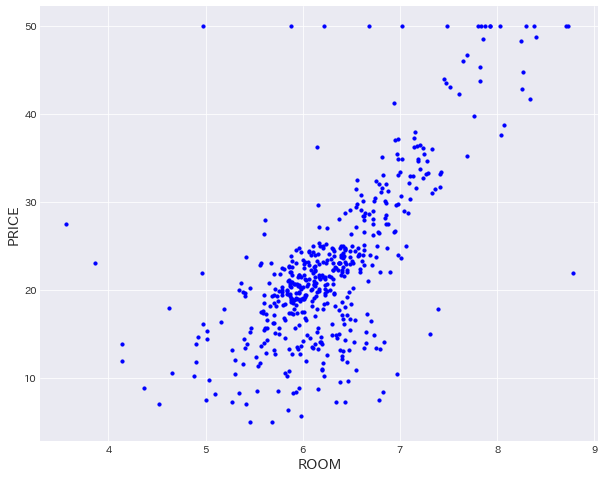

In [17]:
# 散布図の表示
plt.figure(figsize=(9, 3))
fig, ax = plt.subplots()
ax.scatter(x[:, 1], yt, s=10, c='b')
ax.set_xlabel('ROOM', fontsize=14)
ax.set_ylabel('PRICE', fontsize=14)
plt.show()


## 7.6 損失関数の作成

## 7.7 損失関数の微分計算

## 7.8 勾配降下法の適用

## 7.9 プログラム実装

In [18]:
# 入力データxの表示 (ダミー変数を含む)
print(x.shape)
print(x[:5,:])

(506, 2)
[[1.    6.575]
 [1.    6.421]
 [1.    7.185]
 [1.    6.998]
 [1.    7.147]]


In [19]:
# 正解データ yの表示
print(yt[:5])

[24.  21.6 34.7 33.4 36.2]


In [20]:
# 予測関数 (1, x)の値から予測値ypを計算する
def pred(x, w):
    return(x @ w)

In [26]:
# 勾配降下法 初期化処理

# データ系列総数
M  = x.shape[0]

# 入力データ次元数(ダミー変数を含む)
D = x.shape[1]

# 繰り返し回数
iters = 50_000

# 学習率
alpha = 0.01

# 重みベクトルの初期値 (すべての値を1にする)
w = np.ones(D)

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))

array([], shape=(0, 2), dtype=float64)

In [25]:
print(M)
print(D)
print(w)
print(history)

506
2
[1. 1.]
[]


In [27]:
# メイン処理 繰り返しループ
for k in range(iters):
    
    # 予測値の計算 (7.8.1)
    yp = pred(x, w)
    
    # 誤差の計算 (7.8.2)
    yd = yp - yt
    
    # 勾配降下法の実装 (7.8.4)
    w = w - alpha * (x.T @ yd) / M
    
    # 学習曲線描画用データの計算、保存
    if ( k % 100 == 0):
        # 損失関数値の計算 (7.6.1)
        loss = np.mean(yd ** 2) / 2
        # 計算結果の記録
        history = np.vstack((history, np.array([k, loss])))
        # 画面表示
        print( "iter = %d  loss = %f" % (k, loss))    

iter = 0  loss = 154.224934
iter = 100  loss = 29.617518
iter = 200  loss = 29.431766
iter = 300  loss = 29.250428
iter = 400  loss = 29.073399
iter = 500  loss = 28.900577
iter = 600  loss = 28.731861
iter = 700  loss = 28.567154
iter = 800  loss = 28.406360
iter = 900  loss = 28.249388
iter = 1000  loss = 28.096145
iter = 1100  loss = 27.946544
iter = 1200  loss = 27.800498
iter = 1300  loss = 27.657922
iter = 1400  loss = 27.518733
iter = 1500  loss = 27.382852
iter = 1600  loss = 27.250200
iter = 1700  loss = 27.120700
iter = 1800  loss = 26.994277
iter = 1900  loss = 26.870858
iter = 2000  loss = 26.750372
iter = 2100  loss = 26.632749
iter = 2200  loss = 26.517921
iter = 2300  loss = 26.405821
iter = 2400  loss = 26.296385
iter = 2500  loss = 26.189549
iter = 2600  loss = 26.085252
iter = 2700  loss = 25.983433
iter = 2800  loss = 25.884034
iter = 2900  loss = 25.786997
iter = 3000  loss = 25.692265
iter = 3100  loss = 25.599784
iter = 3200  loss = 25.509501
iter = 3300  loss = 2

In [28]:
# 最終的な損失関数初期値、最終値
print('損失関数初期値: %f' % history[0,1])
print('損失関数最終値: %f' % history[-1,1])

損失関数初期値: 154.224934
損失関数最終値: 21.800325


散布図上の回帰直線の描画

図7-10 回帰直線の表示

In [29]:
# 下記直線描画用の座標値計算
xall = x[:, 1].ravel()
xl = np.array([[1, xall.min()], [1, xall.max()]])
yl = pred(xl, w)

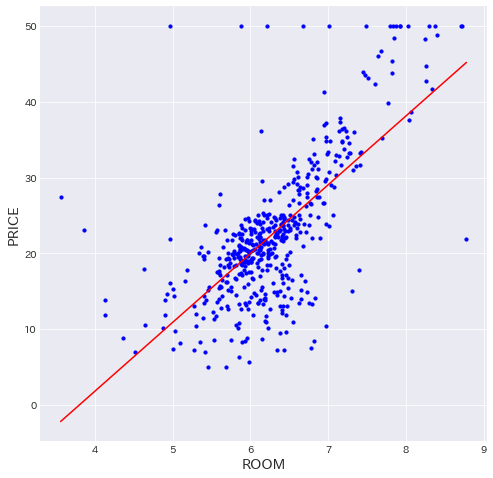

In [31]:
# 散布図と回帰直線の描画
plt.figure(figsize=(8, 8))
plt.scatter(x[:, 1], yt, s=10, c='blue')
plt.xlabel('ROOM', fontsize=14)
plt.ylabel('PRICE', fontsize=14)
plt.plot(xl[:, 1], yl, c='red')
plt.show()

学習曲線の表示

図7-11 学習曲線の表示

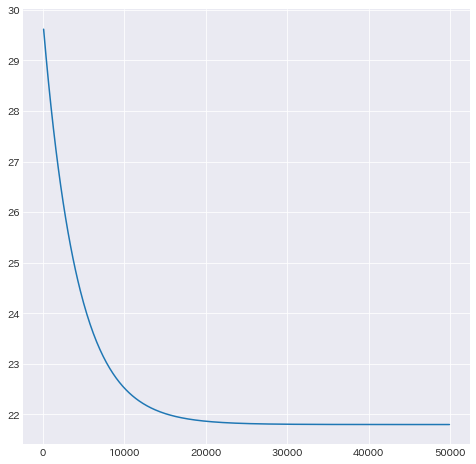

In [33]:
# 学習曲線の表示 (最初の1個分を除く)
plt.figure(figsize=(8, 8))
plt.plot(history[1:, 0], history[1:, 1])
plt.show()

## 7.10 重回帰モデルへの拡張

In [34]:
# 列(LSTAT: 低所得者率)の追加
x_add = x_org[:, feature_names == 'LSTAT']
x2 = np.hstack((x, x_add))
print(x2.shape)

(506, 3)


In [36]:
x2

array([[1.   , 6.575, 4.98 ],
       [1.   , 6.421, 9.14 ],
       [1.   , 7.185, 4.03 ],
       ...,
       [1.   , 6.976, 5.64 ],
       [1.   , 6.794, 6.48 ],
       [1.   , 6.03 , 7.88 ]])

In [35]:
# 入力データxの表示 (ダミーデータを含む)
print(x2[:5,:])

[[1.    6.575 4.98 ]
 [1.    6.421 9.14 ]
 [1.    7.185 4.03 ]
 [1.    6.998 2.94 ]
 [1.    7.147 5.33 ]]


In [39]:
# 初期化処理

# データ系列総数
M  = x2.shape[0]

# 入力データ次元数(ダミー変数を含む)
D = x2.shape[1]

# 繰り返し回数
iters = 50_000

# 学習率
alpha = 0.01

# 重みベクトルの初期値 (すべての値を1にする)
w = np.ones(D)

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))

In [40]:
print(M)
print(D)
print(w)
print(history)

506
3
[1. 1. 1.]
[]


In [41]:
# 繰り返しループ
for k in range(iters):
    
    # 予測値の計算 (7.8.1)
    yp = pred(x2, w)
    
    # 誤差の計算 (7.8.2)
    yd = yp - yt
    
    # 勾配降下法の実装 (7.8.4)
    w = w - alpha * (x2.T @ yd) / M
    
    # 学習曲線描画用データの計算、保存
    if ( k % 100 == 0):
        # 損失関数値の計算 (7.6.1)
        loss = np.mean(yd ** 2) / 2
        # 計算結果の記録
        history = np.vstack((history, np.array([k, loss])))
        # 画面表示
        print( "iter = %d  loss = %f" % (k, loss))    

iter = 0  loss = 112.063982
iter = 100  loss = 3753823486849646657661191585792.000000
iter = 200  loss = 2655334090092121273125402130921363327346591043573060835737600.000000
iter = 300  loss = 1878297995285461085045523284196482247086583201277085616612002646578050704876245186403893248.000000
iter = 400  loss = 1328647635059370371481703736763320157491450137821164352493234234699501961915925811873201177774480485596734461998977253376.000000
iter = 500  loss = 939842635502889662770612459069204655322935013749983559305346547831066121187997098891801614859352058834834127179648062098892108735689096962423654449152.000000
iter = 600  loss = 664814474659069633326225154456281621437843401089919849984802605951952813450932070104832955931408232444704376327323598259772619705292304255008658261182054817148272715437536805126144.000000
iter = 700  loss = 4702683928354890122336859725898191832282143720139237825330730669746867864949239124735902657924806487243589542826018357625164953426808618327631873381924793161

パラメータの修正

In [42]:
# 初期化処理 (パラメータを適切な値に変更)

# データ系列総数
M  = x2.shape[0]

# 入力データ次元数(ダミー変数を含む)
D = x2.shape[1]

# 繰り返し回数
#iters = 50000
iters = 2_000

# 学習率
#alpha = 0.01
alpha = 0.001

# 重みベクトルの初期値 (すべての値を1にする)
w = np.ones(D)

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))

In [43]:
# 繰り返しループ
for k in range(iters):
    
    # 予測値の計算 (7.8.1)
    yp = pred(x2, w)
    
    # 誤差の計算 (7.8.2)
    yd = yp - yt
    
    # 勾配降下法の実装 (7.8.4)
    w = w - alpha * (x2.T @ yd) / M
    
    # 学習曲線描画用データの計算、保存
    if ( k % 100 == 0):
        # 損失関数値の計算 (7.6.1)
        loss = np.mean(yd ** 2) / 2
        # 計算結果の記録
        history = np.vstack((history, np.array([k, loss])))
        # 画面表示
        print( "iter = %d  loss = %f" % (k, loss))    

iter = 0  loss = 112.063982
iter = 100  loss = 25.358934
iter = 200  loss = 16.391055
iter = 300  loss = 15.403015
iter = 400  loss = 15.294135
iter = 500  loss = 15.282114
iter = 600  loss = 15.280764
iter = 700  loss = 15.280589
iter = 800  loss = 15.280544
iter = 900  loss = 15.280514
iter = 1000  loss = 15.280485
iter = 1100  loss = 15.280456
iter = 1200  loss = 15.280428
iter = 1300  loss = 15.280399
iter = 1400  loss = 15.280371
iter = 1500  loss = 15.280342
iter = 1600  loss = 15.280314
iter = 1700  loss = 15.280285
iter = 1800  loss = 15.280257
iter = 1900  loss = 15.280228


In [44]:
# 最終的な損失関数初期値、最終値
print('損失関数初期値: %f' % history[0,1])
print('損失関数最終値: %f' % history[-1,1])

損失関数初期値: 112.063982
損失関数最終値: 15.280228


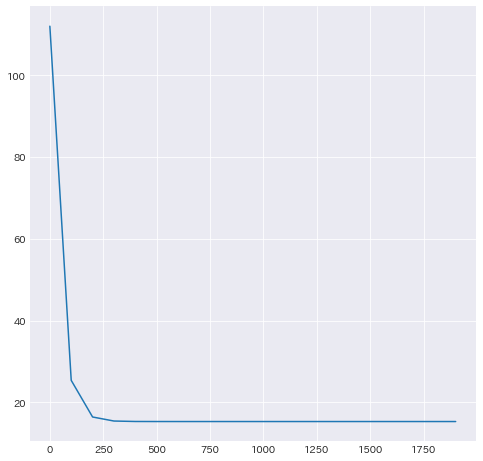

In [45]:
# 学習曲線の表示 (最初の10個分を除く)
plt.figure(figsize=(8, 8))
plt.plot(history[:, 0], history[:, 1])
plt.show()